# Extract Features

1. Read csv files and load as dfs
2. Combine dfs
3. Get POS, NER
4. Save in new features_df
5. Get semantic cosine similarity

In [1]:
import os, sys

import pandas as pd

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from log_files import LogData
from data_processing import DataProcessing
from feature_extraction import SpacyFeatureExtraction

In [2]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
log_file_path = "data/prediction_logs"
predictions = True
df = log_files.read_data(notebook_dir, log_file_path, predictions)
df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_experiments/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_experiments/../data/prediction_logs/batch_1-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_experiments/../data/prediction_logs/batch_1-predictions/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_experiments/../data/prediction_logs/batch_2-predictions
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_experiments/../data/prediction_logs/batch_2-predictions/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/misc_e

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
0,"On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.",1,finance,gpt-3.5-turbo,NAVI_GATOR,0,1
1,"On 2024-08-21, Morgan Stanley speculates the operating income at Amazon will likely increase.",1,finance,gpt-4o,NAVI_GATOR,0,2
2,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1
3,"On August 21, 2023, Goldman Sachs speculates that the stock price at Amazon will likely increase.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,2
4,"George, a financial analyst, predicts that on 01/15/2024, the Google revenue may rise.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,3
5,"According to BlackRock, the operating cash flow at ExxonMobil would fall in Q3 2023.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,4
6,"In Q2 2023, Wells Fargo envisions that the stock price at Tesla has some probability to remain stable.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,5


In [4]:
df[66 : 67]

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
66,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1


In [5]:
df[2 : 3]

,Base Sentence,Sentence Label,Domain,Model Name,API Name,Batch ID,Template Number
2,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,finance,mixtral-8x7b-instruct,NAVI_GATOR,0,1


- issue: `obesity rate` is not being captures by POS or NER.

In [6]:
only_predictions = DataProcessing.df_to_list(df, 'Base Sentence')
print(only_predictions)

sfe_class = SpacyFeatureExtraction(df, "Base Sentence")
word_leveL_disable_components = ["lemmatizer"]
word_level_pos_tags, word_level_pos_mappings, word_level_ner_entities, word_level_ner_mappings =  sfe_class.extract_features(data=only_predictions, disable_components=word_leveL_disable_components)
all_word_level_pos_df = DataProcessing.convert_to_df(word_level_pos_tags, mapping=word_level_pos_mappings)
all_word_level_ner_df = DataProcessing.convert_to_df(word_level_ner_entities, word_level_ner_mappings)
pred_pos_ner_features = [all_word_level_pos_df, all_word_level_ner_df]
pred_pos_ner_features_df = DataProcessing.concat_dfs(pred_pos_ner_features, axis=1, ignore_index=False)
pred_pos_ner_features_df.head()

['On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.', 'On 2024-08-21, Morgan Stanley speculates the operating income at Amazon will likely increase.', 'According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.', 'On August 21, 2023, Goldman Sachs speculates that the stock price at Amazon will likely increase.', 'George, a financial analyst, predicts that on 01/15/2024, the Google revenue may rise.', 'According to BlackRock, the operating cash flow at ExxonMobil would fall in Q3 2023.', 'In Q2 2023, Wells Fargo envisions that the stock price at Tesla has some probability to remain stable.', 'The stock price at Apple should stay the same in August 2023, according to Morgan Stanley.', 'Dr. Smith predicts that the prevalence of chronic illnesses at rural health clinics will potentially decrease in Q4 of 2026.', 'WHO forecasts that the prevalence of chronic illnesses at global urban

,ADV_1,ADJ_1,VERB_5,PROPN_6,ADJ_4,DET_2,SYM_2,NOUN_3,DET_3,ADJ_2,PROPN_1,NOUN_5,VERB_1,AUX_1,CCONJ_1,NOUN_8,PROPN_3,ADP_3,NUM_2,PUNCT_4,PUNCT_2,PUNCT_6,SCONJ_1,ADP_4,NOUN_7,ADJ_3,VERB_4,ADP_5,ADP_2,NOUN_1,DET_5,SYM_1,DET_4,PART_2,VERB_3,ADP_1,PROPN_4,DET_1,PART_1,NOUN_2,PUNCT_1,NOUN_4,AUX_2,NUM_1,NOUN_6,PRON_1,NUM_3,PROPN_5,PROPN_7,PUNCT_5,VERB_2,PROPN_2,PUNCT_3,ORG_1,ORG_3,LOC_1,GPE_1,DATE_2,PERCENT_1,PERSON_1,NORP_1,EVENT_1,DATE_1,CARDINAL_1,TIME_1,GPE_2,ORG_2
0,potentially,financial,NaN,NaN,NaN,the,NaN,NaN,NaN,NaN,August,NaN,predict,will,NaN,NaN,Q3,at,2024,.,",",NaN,that,in,NaN,NaN,NaN,of,as,analyst,NaN,NaN,NaN,NaN,NaN,On,NaN,a,NaN,revenue,",",NaN,NaN,21,NaN,I,2027,NaN,NaN,NaN,decrease,Amazon,",",Amazon,NaN,NaN,Q3,2027,NaN,NaN,NaN,NaN,"August 21, 2024",NaN,NaN,NaN,NaN
1,likely,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,Morgan,NaN,speculates,will,NaN,NaN,Amazon,NaN,08,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,at,operating,NaN,-,NaN,NaN,NaN,On,NaN,the,NaN,income,",",NaN,NaN,2024,NaN,NaN,21,NaN,NaN,NaN,increase,Stanley,NaN,Morgan Stanley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-21,NaN,NaN,NaN,Amazon
2,NaN,net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPMorgan,NaN,According,is,NaN,NaN,Microsoft,in,NaN,NaN,.,NaN,NaN,of,NaN,NaN,NaN,NaN,at,profit,NaN,NaN,NaN,NaN,decrease,to,Q2,the,to,NaN,",",NaN,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN,expected,Chase,NaN,JPMorgan Chase,Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024,NaN,NaN,NaN,Microsoft
3,likely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,August,NaN,speculates,will,NaN,NaN,Sachs,NaN,2023,NaN,",",NaN,that,NaN,NaN,NaN,NaN,NaN,at,stock,NaN,NaN,NaN,NaN,NaN,On,Amazon,the,NaN,price,",",NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,increase,Goldman,.,Goldman Sachs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"August 21, 2023",NaN,NaN,NaN,Amazon
4,NaN,financial,NaN,NaN,NaN,the,NaN,NaN,NaN,NaN,George,NaN,predicts,may,NaN,NaN,NaN,NaN,NaN,.,",",NaN,that,NaN,NaN,NaN,NaN,NaN,NaN,analyst,NaN,NaN,NaN,NaN,NaN,on,NaN,a,NaN,revenue,",",NaN,NaN,01/15/2024,NaN,NaN,NaN,NaN,NaN,NaN,rise,Google,",",Google,NaN,NaN,NaN,NaN,NaN,George,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
encoded_pred_pos_ner_features_df = DataProcessing.encode_tags_entities_df(pred_pos_ner_features_df, df)
encoded_pred_pos_ner_features_df.head(3)

,Base Sentence,Sentence Label,ADV_1,ADJ_1,VERB_5,PROPN_6,ADJ_4,DET_2,SYM_2,NOUN_3,DET_3,ADJ_2,PROPN_1,NOUN_5,VERB_1,AUX_1,CCONJ_1,NOUN_8,PROPN_3,ADP_3,NUM_2,PUNCT_4,PUNCT_2,PUNCT_6,SCONJ_1,ADP_4,NOUN_7,ADJ_3,VERB_4,ADP_5,ADP_2,NOUN_1,DET_5,SYM_1,DET_4,PART_2,VERB_3,ADP_1,PROPN_4,DET_1,PART_1,NOUN_2,PUNCT_1,NOUN_4,AUX_2,NUM_1,NOUN_6,PRON_1,NUM_3,PROPN_5,PROPN_7,PUNCT_5,VERB_2,PROPN_2,PUNCT_3,ORG_1,ORG_3,LOC_1,GPE_1,DATE_2,PERCENT_1,PERSON_1,NORP_1,EVENT_1,DATE_1,CARDINAL_1,TIME_1,GPE_2,ORG_2
0,"On August 21, 2024, as a financial analyst, I predict that the revenue at Amazon will potentially decrease in Q3 of 2027.",1,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
1,"On 2024-08-21, Morgan Stanley speculates the operating income at Amazon will likely increase.",1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,"According to JPMorgan Chase, the net profit at Microsoft is expected to decrease in Q2 of 2024.",1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1


In [8]:
encoded_pred_pos_ner_features_df.iloc[:, 2:]

,ADV_1,ADJ_1,VERB_5,PROPN_6,ADJ_4,DET_2,SYM_2,NOUN_3,DET_3,ADJ_2,PROPN_1,NOUN_5,VERB_1,AUX_1,CCONJ_1,NOUN_8,PROPN_3,ADP_3,NUM_2,PUNCT_4,PUNCT_2,PUNCT_6,SCONJ_1,ADP_4,NOUN_7,ADJ_3,VERB_4,ADP_5,ADP_2,NOUN_1,DET_5,SYM_1,DET_4,PART_2,VERB_3,ADP_1,PROPN_4,DET_1,PART_1,NOUN_2,PUNCT_1,NOUN_4,AUX_2,NUM_1,NOUN_6,PRON_1,NUM_3,PROPN_5,PROPN_7,PUNCT_5,VERB_2,PROPN_2,PUNCT_3,ORG_1,ORG_3,LOC_1,GPE_1,DATE_2,PERCENT_1,PERSON_1,NORP_1,EVENT_1,DATE_1,CARDINAL_1,TIME_1,GPE_2,ORG_2
0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
6,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
7,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8,1,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## GaussianMixture

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


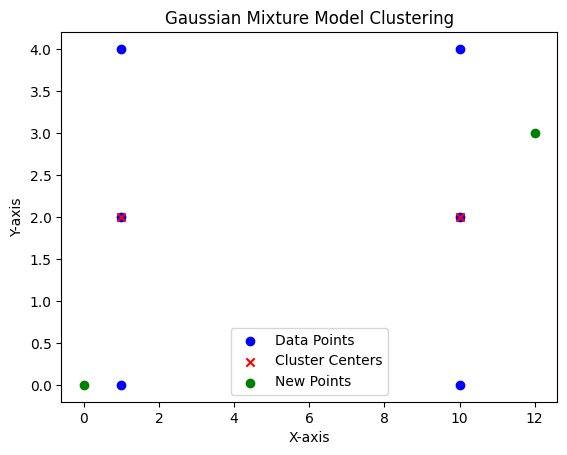

In [10]:
# Data points
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Fit Gaussian Mixture Model
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

# Predict cluster for new points
predictions = gm.predict([[0, 0], [12, 3]])

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.scatter([0, 12], [0, 3], c='green', marker='o', label='New Points')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


In [11]:
encoded_pred_pos_ner_features_df.iloc[:, 2:].to_numpy()

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [12]:
encoded_features = encoded_pred_pos_ner_features_df.iloc[:, 2:].to_numpy()
gm = GaussianMixture(n_components=2, random_state=0).fit(encoded_features)
gm.means_

array([[0.625     , 0.83928571, 0.01785714, 0.01785714, 0.01785714,
        0.80357143, 0.03571429, 0.98214286, 0.23214286, 0.60714286,
        1.        , 0.46428571, 1.        , 0.73214286, 0.16071429,
        0.03571429, 0.73214286, 0.80357143, 0.19642857, 0.07142857,
        0.80357143, 0.01785714, 0.76785714, 0.30357143, 0.17857143,
        0.19642857, 0.08928571, 0.07142857, 1.        , 1.        ,
        0.01785714, 0.03571429, 0.07142857, 0.        , 0.33928571,
        1.        , 0.39285714, 1.        , 0.17857143, 1.        ,
        1.        , 0.73214286, 0.01785714, 1.        , 0.26785714,
        0.16071429, 0.03571429, 0.125     , 0.        , 0.03571429,
        0.96428571, 0.91071429, 0.375     , 0.41071429, 0.        ,
        0.03571429, 0.32142857, 0.03571429, 0.01785714, 0.53571429,
        0.05357143, 0.01785714, 0.875     , 0.03571429, 0.05357143,
        0.05357143, 0.05357143],
       [0.4       , 0.475     , 0.        , 0.175     , 0.        ,
        0.425  

In [13]:
encoded_features

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

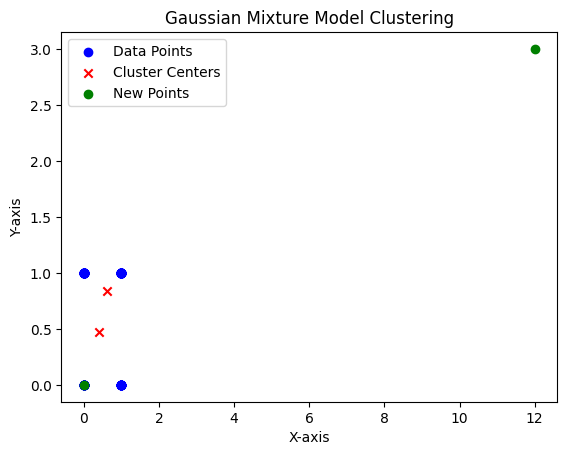

In [14]:
# Plot the data points and cluster centers
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c='blue', label='Data Points')
plt.scatter(gm.means_[:, 0], gm.means_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.scatter([0, 12], [0, 3], c='green', marker='o', label='New Points')

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

## K-Means

1. TUTORIAL: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb#scrollTo=p4YlgrXezCn9

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Ex

In [16]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

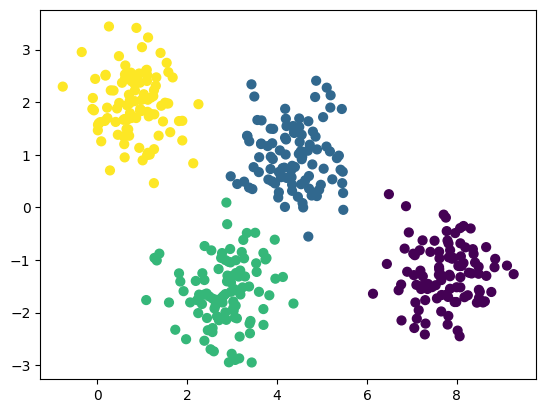

In [17]:
# Plot the data with k-means labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

### My Code

In [18]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
X

array([[ 6.48826703e+00,  2.50064460e-01],
       [ 2.52194722e+00, -2.69798647e+00],
       [ 3.06877291e+00, -2.90007604e+00],
       [ 4.31427482e+00,  7.02950576e-01],
       [ 2.38449945e+00, -2.53563494e+00],
       [ 7.80540956e+00, -1.70297829e+00],
       [ 8.38773426e-01,  2.22322228e+00],
       [ 4.17614316e+00,  7.93137001e-03],
       [ 3.02668532e+00, -1.79041773e+00],
       [ 1.26987864e+00,  1.76747403e+00],
       [ 7.81974467e+00, -9.49424332e-01],
       [ 1.87335276e-01,  2.51921931e+00],
       [ 3.43116792e+00,  2.33812285e+00],
       [ 3.39806103e+00, -2.39482483e+00],
       [ 2.95679593e+00, -7.91981675e-01],
       [ 1.13171965e+00,  3.22881491e+00],
       [ 1.59701749e+00, -1.80822253e+00],
       [ 4.09867867e-01,  1.62350489e+00],
       [ 3.89290127e+00,  1.21767506e+00],
       [ 3.54666555e+00, -1.22768985e+00],
       [ 3.53554556e+00, -1.06406044e+00],
       [ 2.66329169e+00, -2.07216196e+00],
       [ 7.15134224e+00, -1.95483315e+00],
       [ 4.

In [22]:
# Reduce dimensionality to 2 features using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(encoded_features)
# X_reduced

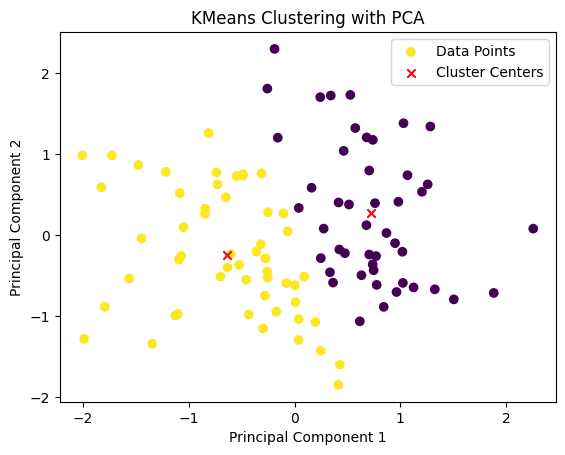

In [20]:


# Example data with 67 features
X = np.random.randint(0, 2, (100, 67))  # Replace this with your actual data

# Reduce dimensionality to 2 features using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_reduced)

# Plot the data points and cluster centers
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Cluster Centers')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.show()
